In [13]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import pandas as pd
from cycler import cycler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import sklearn



def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    print(label_ids)
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=np.arange(label_ids.shape[0]))#id_to_label_dict[label_id])
    plt.legend(loc='best')

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.2.


In [2]:
df = pd.read_csv("data/bags.csv")

#Separate the DF into Train and Test
msk = np.random.rand(len(df)) < 0.7

test_df = df[~msk]

df = df[msk]

#DF is now the training set

#Separate the Training DF into Train and Validation
msk = np.random.rand(len(df)) < 0.8

train_df = df[msk]
validation_df = df[~msk]


print(train_df.shape)

(7354, 1203)


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.metrics.cluster import davies_bouldin_score

# The kmeans algorithm is implemented in the scikits-learn library

#A = pd.read_csv("A.csv")
 
 
distortions = []
cost_old = 100
cost = 0
epsilon = 0.0001
error_label = []
silhouette_avgs = []
davies_bouldin_avgs = []

for k in range (5, 405,10):
    
    print("Calculating metrics for k = ", k)
    
    if (abs(cost - cost_old) < epsilon):
        break
    
    cost_old = cost
    
    
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(train_df.iloc[:, :])
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    
    #Calculate Silhouette score
    print("Calculating Silhouette score...")
    silhouette_avg = silhouette_score(train_df, labels)
    silhouette_avgs.append(silhouette_avg)
    
    #Calculate Davies_boulding score
    #print("Calculating Davies Boulding score...")
    #davies_bouldin_avg = davies_bouldin_score(train_df, labels)
    #davies_bouldin_avgs.append(davies_bouldin_avg)
    
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    cost = inertia/df.shape[0]
    
    distortions.append(cost)
    error_label.append(k)
    #print("k:",k, " cost:", cost)

Calculating metrics for k =  5
Calculating Silhouette score...
Calculating metrics for k =  15
Calculating Silhouette score...
Calculating metrics for k =  25
Calculating Silhouette score...
Calculating metrics for k =  35
Calculating Silhouette score...
Calculating metrics for k =  45
Calculating Silhouette score...
Calculating metrics for k =  55
Calculating Silhouette score...
Calculating metrics for k =  65
Calculating Silhouette score...
Calculating metrics for k =  75
Calculating Silhouette score...
Calculating metrics for k =  85
Calculating Silhouette score...
Calculating metrics for k =  95
Calculating Silhouette score...
Calculating metrics for k =  105
Calculating Silhouette score...
Calculating metrics for k =  115
Calculating Silhouette score...
Calculating metrics for k =  125
Calculating Silhouette score...
Calculating metrics for k =  135
Calculating Silhouette score...
Calculating metrics for k =  145
Calculating Silhouette score...
Calculating metrics for k =  155
Cal

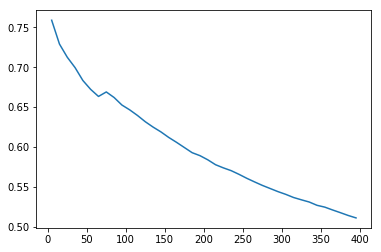

In [6]:
plt.plot(error_label, distortions)

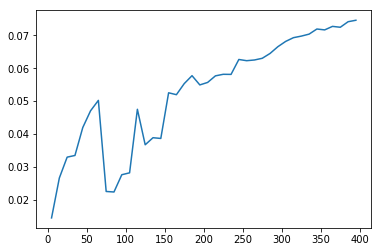

In [8]:
plt.plot(error_label, silhouette_avgs)

In [ ]:
# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans
  
#A = pd.read_csv("A.csv")
 
 
distortions = []
cost_old = 100
cost = 0
for k in range (1, 100,10):
 
    if (abs(cost - cost_old) < 0.0001):
        break

    cost_old = cost

    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(train_df.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    cost = inertia/df.shape[0]
    
    distortions.append(cost)
    print("k:",k, " cost:", cost)

In [24]:
# The dbscan algorithm is implemented in the scikits-learn library
from sklearn.cluster import DBSCAN
  
#A = pd.read_csv("A.csv")

db = DBSCAN(eps=0.001, min_samples=5, n_jobs=-1).fit(train_df)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

20


In [9]:
%load_ext wurlitzer

In [10]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

#t-SNE embedding of the digits dataset
# print("Computing t-SNE embedding")
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=50.0)
# t0 = time()
# X_tsne = tsne.fit_transform(train_df)

# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

# plt.show()

from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, perplexity=400, verbose=1)
Y = tsne.fit_transform(train_df)


Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 400.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 80.00 seconds (sparsity = 0.249249)!
Learning embedding...
Iteration 51: error is 59.494002 (50 iterations in 5.00 seconds)
Iteration 101: error is 59.459374 (50 iterations in 5.00 seconds)
Iteration 151: error is 59.455335 (50 iterations in 5.00 seconds)
Iteration 201: error is 59.454351 (50 iterations in 5.00 seconds)
Iteration 251: error is 2.469616 (50 iterations in 5.00 seconds)
Iteration 301: error is 2.469614 (50 iterations in 5.00 seconds)
Iteration 351: error is 2.340913 (50 iterations in 5.00 seconds)
Iteration 401: error is 2.240769 (50 iterations in 4.00 seconds)
Iteration 451: error is 2.228270 (50 iterations in 4.00 seconds)
Iteration 501: error is 2.221517 (50 iterations in 4.00 seconds)
Iteration 551: error is 2.217459 (50 iterations in 6.00 seconds)
Iteration 601: error is 2.214748 (50 iterations in 4.00 seconds)
Iter

[131 140 140 ... 103  17 287]


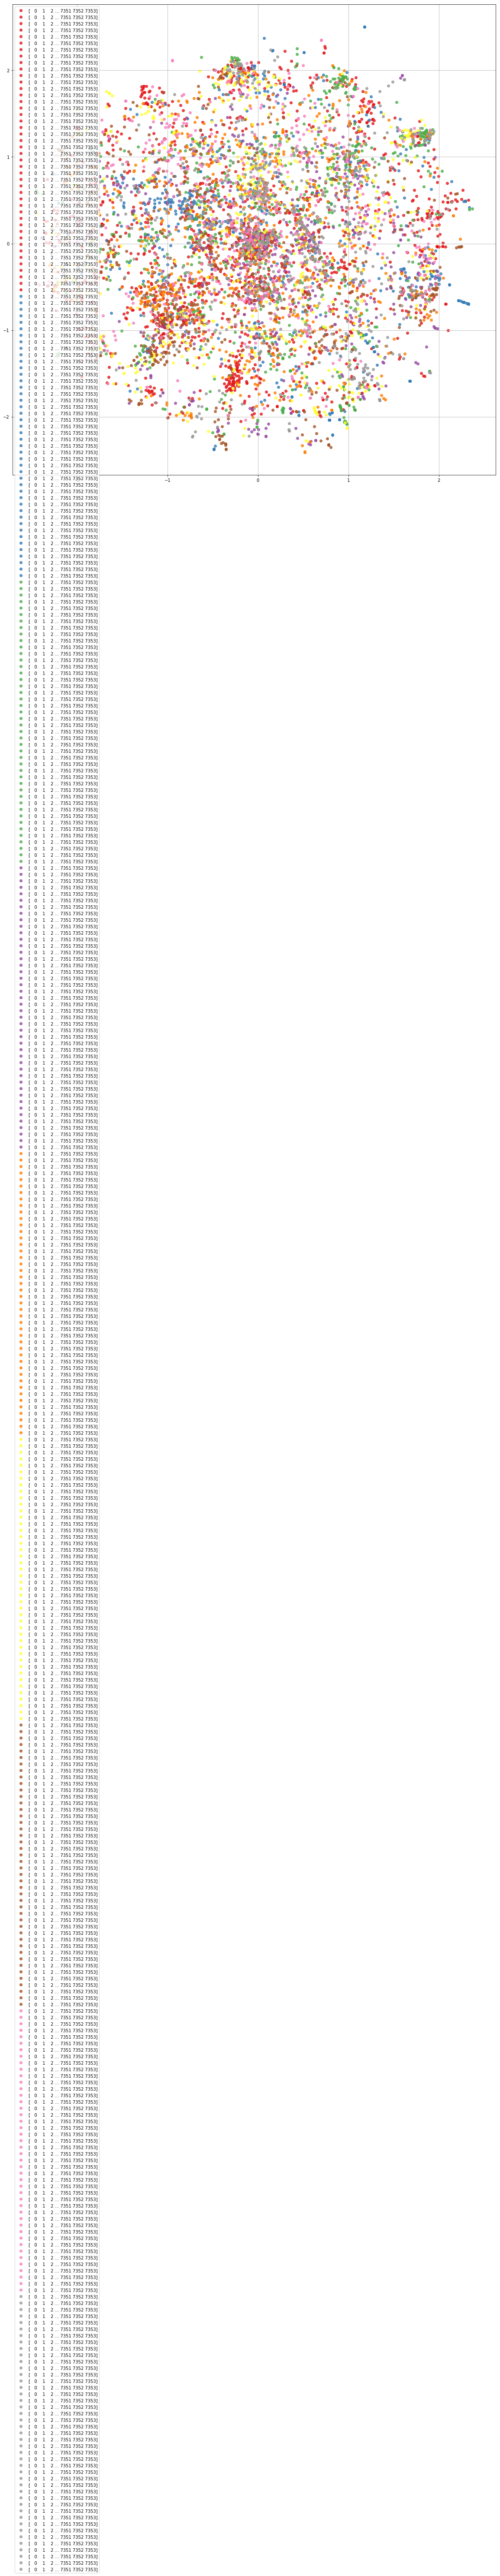

In [14]:
tsne_result_scaled = StandardScaler().fit_transform(Y)

visualize_scatter(tsne_result_scaled, labels)

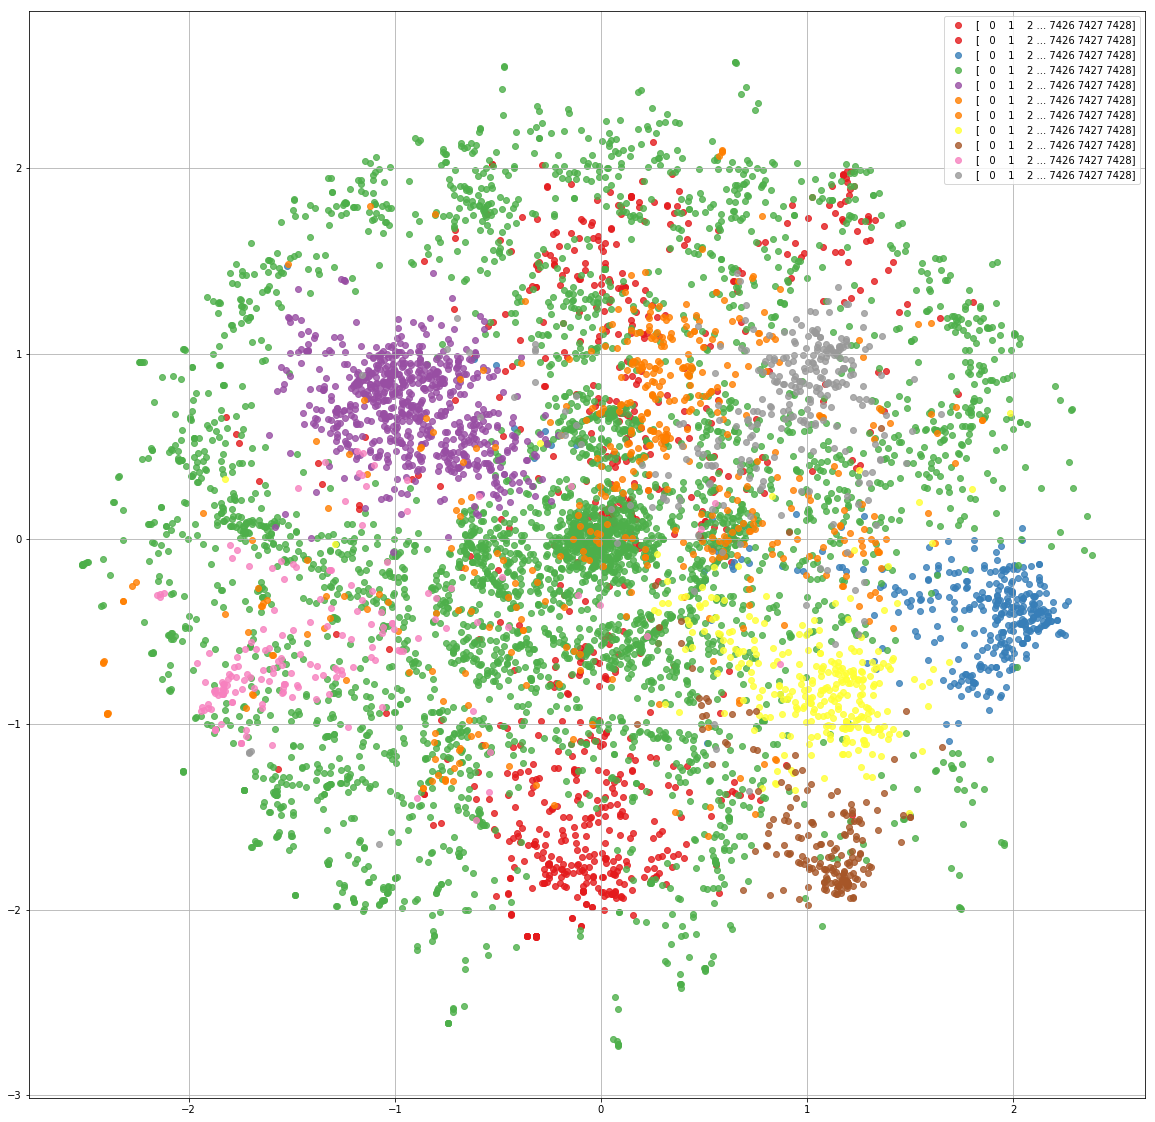

In [56]:
tsne_result_scaled = StandardScaler().fit_transform(Y)

visualize_scatter(tsne_result_scaled, labels)

#500

In [ ]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, cmap=plt.cm.get_cmap("jet", n_clusters_), c=labels, marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
fp = open("data/health.txt")

In [ ]:
for i, line in enumerate(fp):
    if i == 25:
        # 26th line
    elif i == 29:
        # 30th line
    elif i > 29:
        break
fp.close()